In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
def ref_poisson(rate, t_len, refac=5):
    t = 0
    spikes = []
    x_rand = np.random.uniform
    
    while t < t_len:
        
        t -= np.log(x_rand())/rate
        spikes.append(t)
        t += refac
    return np.array(spikes)        

In [11]:
spk_res = []
for _ in range(50):
    spk_res.append(ref_poisson(25.0/1000.0, 10*1000))

In [14]:
tmp = spk_res[0]
tmp[tmp < 1000].shape

(26,)

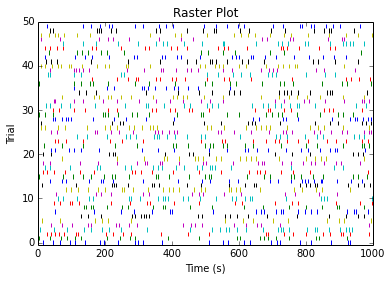

In [19]:
color_cycle = plt.rcParams['axes.color_cycle']

# plot the spike raster
for z_i, ze in enumerate(list(spk_res)):
    color = [color_cycle[z_i % len(color_cycle)]]
    plt.eventplot(ze[ze < 1000], colors=color, lineoffsets=[1*z_i])
plt.xlim(0, 1000)
plt.ylim(-0.5, 1*len(spk_res))
plt.ylabel("Trial")
plt.xlabel("Time (s)")
plt.title("Raster Plot")
plt.savefig("spike-raster")

In [21]:
# get the firing rate
bins = np.arange(0, 0.505, 0.01)
multi_trial_rate = np.zeros((bins.shape[0] - 1, len(spk_res)))
for z_i, s_r in enumerate(spk_res):
    filt = s_r[s_r < 500]
    multi_trial_rate[:, z_i] = np.histogram(filt, bins=bins)[0]